# Problematic Internet Use | Part B : EDA

After data cleaning, we will now perform explanatory data analysis on the dataset to uncover any insights that could help us answer our initial research questions. So far, the following features stand out (in determining a correlation with PIU) and so we will start with them first: age, sleep disturbances, and physical activity.

### Importing Dependencies and Cleaned Data Preview

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv("cleaned_data.csv")

display(df.head())

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,Spring,39.0,55.0,Fall,3.0,2
1,000fd460,Summer,9,0,Spring,65.0,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1
4,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1


### 1. Correlation Heatmap of Key Features with PIU Severity

This should show us which features have the strongest relationships with PIU Severity

The strongest correlates with PIU severity are sleep disturbance scores (SDS_Total_T), educational internet usage hours, BMI, and height. This suggests that individuals with higher PIU severity may also experience increased sleep disturbances and engage in internet use for educational purposes, which could overlap with recreational internet use. Additionally, certain physical characteristics, like BMI and height, may be related to PIU severity, although further research would be needed to clarify these associations.


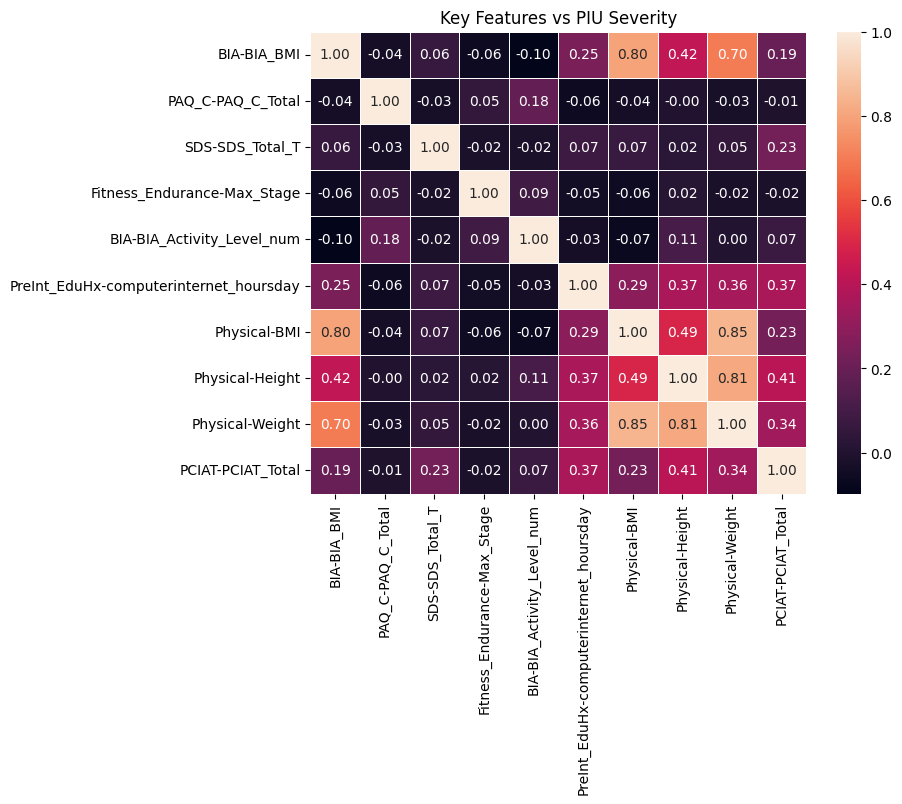

In [27]:
selected_columns = ['BIA-BIA_BMI', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_T', 'Fitness_Endurance-Max_Stage', 'BIA-BIA_Activity_Level_num', 'PreInt_EduHx-computerinternet_hoursday', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'PCIAT-PCIAT_Total']


#First, we normalize the data so that all features are on the same scale
df_selected = df[selected_columns]
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_selected)
df_normalized = pd.DataFrame(df_normalized, columns=selected_columns)

#Now, we calculate the correlation matrix
correlation_matrix = df_normalized.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cbar=True)
plt.title("Key Features vs PIU Severity")
plt.show()

### 2. Pair Plot for Multi-Feature Analysis

#### Distributions (Diagonal):

Physical Activity (PAQ_C-PAQ_C_Total): The distribution for physical activity is left-skewed, with most participants having lower activity levels.

Sleep Disturbances (SDS-SDS_Total_T): The sleep disturbance score has a wide distribution, indicating variability in sleep disturbances across the sample.

BMI (BIA-BIA_BMI): The BMI distribution is mostly concentrated around 20-30, with fewer cases at higher BMI values.

PIU Severity (PCIAT-PCIAT_Total): PIU severity is skewed towards the lower end, with most individuals having moderate scores, though higher scores are also present.


#### Scatter Plots (Off-diagonal) and Key Interactions:

Physical Activity vs. PIU Severity: There is no clear trend or correlation between physical activity and PIU severity across the severity index levels (0-3). This suggests that physical activity levels might not be directly associated with PIU severity.

Sleep Disturbances vs. PIU Severity: There appears to be a noticeable distribution pattern where higher sleep disturbance scores (SDS-SDS_Total_T) are slightly more common in the higher PIU severity categories (particularly the green and yellow dots representing severity levels 2 and 3). This pattern aligns with previous findings suggesting a relationship between increased PIU severity and greater sleep disturbances.

BMI vs. PIU Severity: There isn’t a strong trend between BMI and PIU severity, as the data points for different severity levels overlap significantly. However, higher BMI values appear more spread across severity levels, indicating a slight potential for association but without a strong correlation.

#### Other Pairwise Relationships:

BMI vs. Physical Activity: There’s some spread in the distribution, but no clear relationship is apparent. This is expected, as BMI may not necessarily correlate directly with physical activity levels due to individual variations.

Sleep Disturbances vs. Physical Activity: There is no strong relationship observed here, suggesting that sleep disturbances may not be directly linked to physical activity levels in this sample.

BMI vs. Sleep Disturbances: Similarly, there is no significant correlation between BMI and sleep disturbance scores, as the points are widely scattered without a discernible pattern.

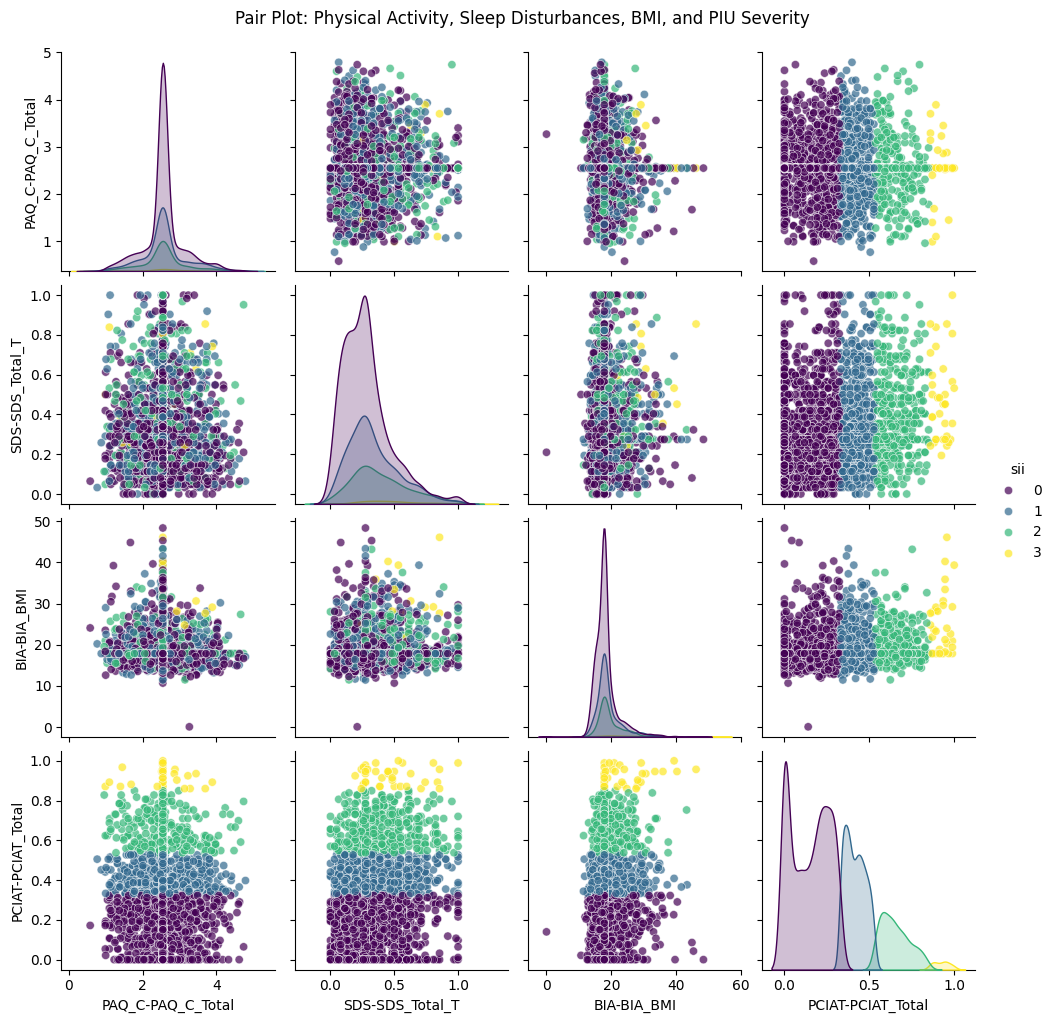

In [48]:
#Select relevant columns for the pair plot
selected_columns = ['PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_T', 'BIA-BIA_BMI', 'PCIAT-PCIAT_Total']
df_selected = df[selected_columns].copy()
df_selected['sii'] = df['sii']

# Create the pair plot, grouped by sii using hues
sns.pairplot(
    df_selected,
    hue='sii',  
    diag_kind='kde',  
    palette='viridis',  
    plot_kws={'alpha': 0.7}  
)


plt.suptitle("Pair Plot: Physical Activity, Sleep Disturbances, BMI, and PIU Severity", y=1.02)
plt.show()




#### General Trends and Patterns
Across the variables, there are few strong linear relationships. This suggests that PIU severity is not linearly correlated with physical activity, BMI, or even sleep disturbances, although some associations exist (e.g., a moderate relationship with sleep disturbances).


The different colors representing the severity index indicate that PIU severity levels are somewhat independent of physical characteristics like BMI and physical activity. However, sleep disturbances show some clustering with higher severity levels, indicating a possible association worth further exploration.

### 3. Distribution of PIU Severity (sii) across Age Groups (Box/Violin Plot)

Compares PIU Severiry across each age group. Both plots suggest variability in PIU Severity across different age group. The goal is to identify an age related trend in sii.


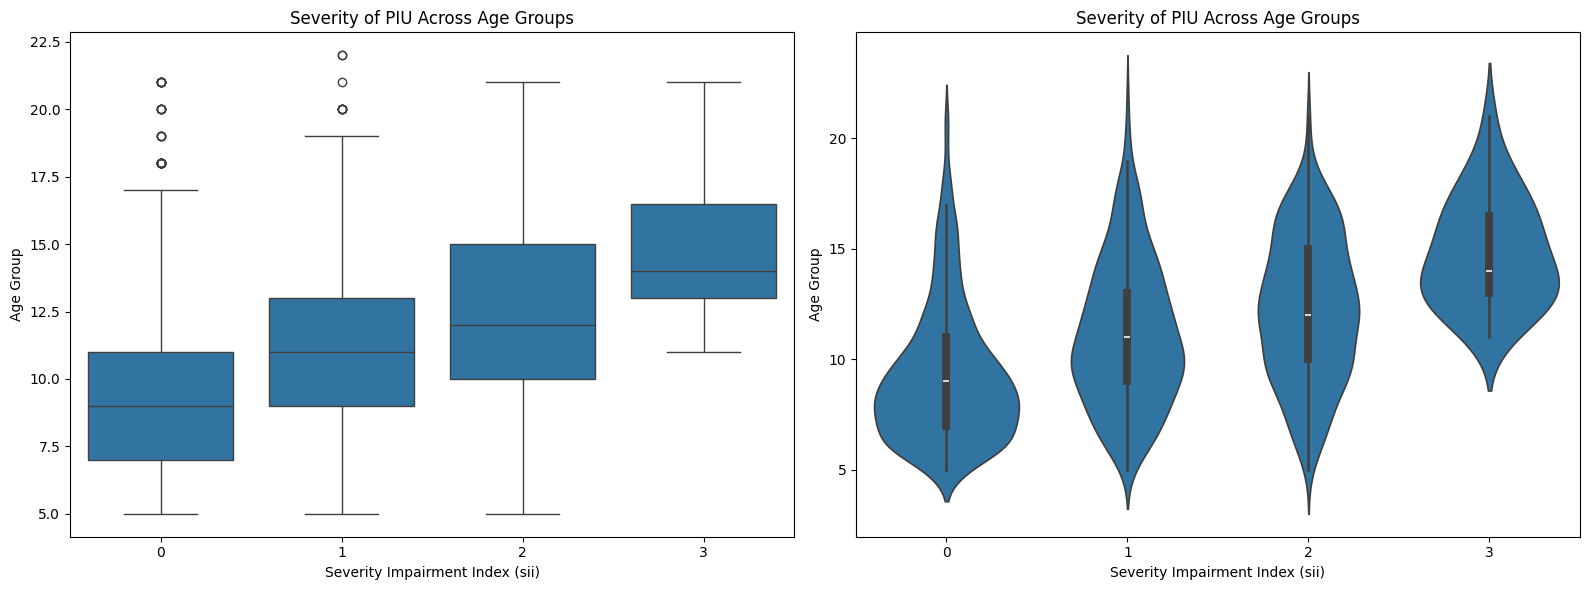

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Box Plot of Age Group vs Severity of PIU
sns.boxplot(data=df, x='sii', y='Basic_Demos-Age', ax=axes[0])
axes[0].set_title("Severity of PIU Across Age Groups")
axes[0].set_ylabel("Age Group")
axes[0].set_xlabel("Severity Impairment Index (sii)")

#Violin Plot of Age Group vs Severity of PIU
sns.violinplot(x='sii', y='Basic_Demos-Age', data=df, ax=axes[1])
axes[1].set_title('Severity of PIU Across Age Groups')
axes[1].set_ylabel("Age Group")
axes[1].set_xlabel("Severity Impairment Index (sii)")


plt.tight_layout()
plt.show()

### 4. PIU Severity Distribution Across Age Groups (Normalized Bar Charts)

These charts are normalized because of the inequal data points suggesting a bias towards the younger age category as more samples are recorded in the 6-12 years range. 

The graphs suggest a decrease of 0 sii and an increase of higher sii scores as the age increases. 

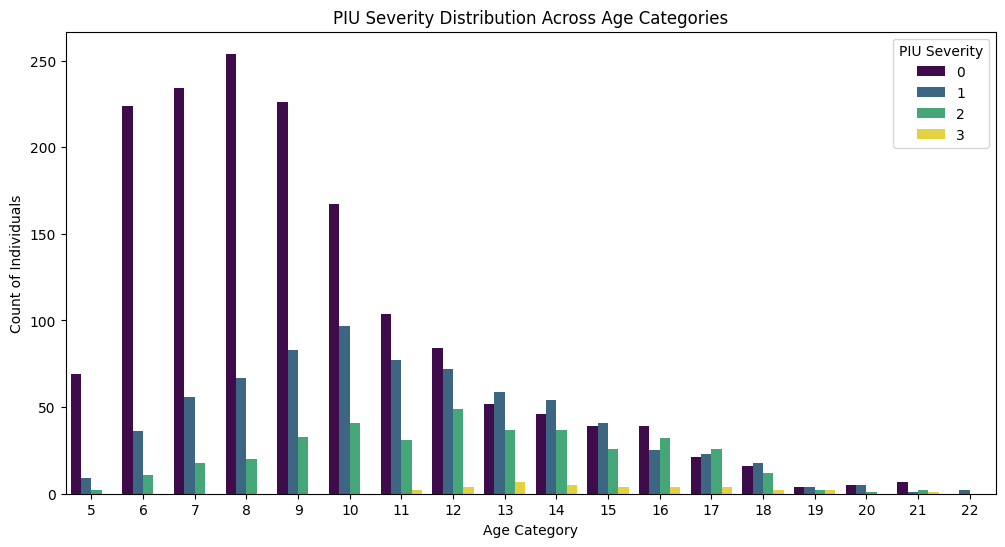

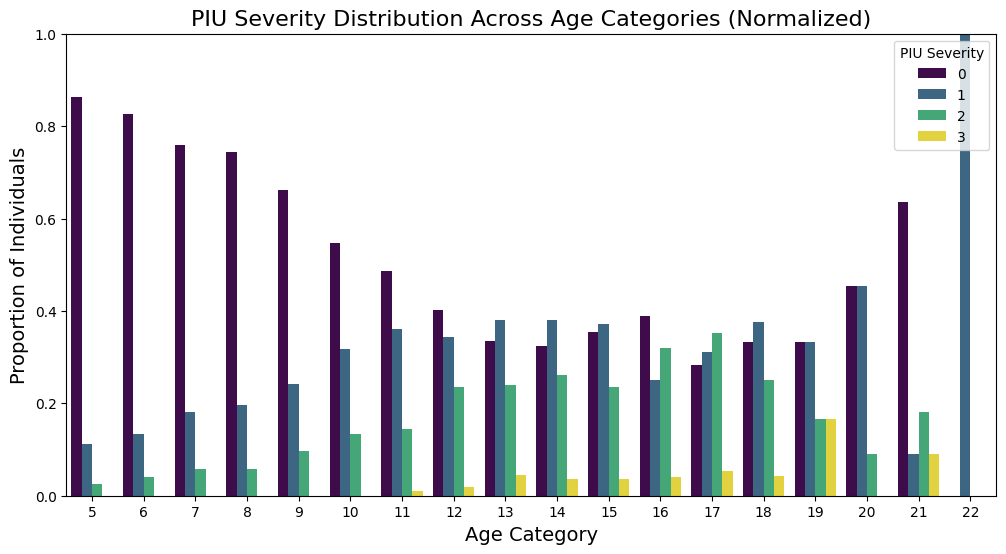

In [102]:

plt.figure(figsize=(12, 6))

#Grouped bar plot with age categories on the x-axis, PIU severity (SII) on the hue
sns.countplot(data=df, x='Basic_Demos-Age', hue='sii', palette='viridis')

plt.title("PIU Severity Distribution Across Age Categories")
plt.xlabel("Age Category")
plt.ylabel("Count of Individuals")
plt.legend(title='PIU Severity', loc='upper right')
plt.show()

#Calculate proportions
proportions = df.groupby(['Basic_Demos-Age', 'sii']).size().reset_index(name='count')
proportions['proportion'] = proportions.groupby('Basic_Demos-Age')['count'].transform(lambda x: x / x.sum())

#Plot grouped bar chart with proportions
plt.figure(figsize=(12, 6))
sns.barplot(data=proportions, x='Basic_Demos-Age', y='proportion', hue='sii', palette='viridis')

plt.title("PIU Severity Distribution Across Age Categories (Normalized)", fontsize=16)
plt.xlabel("Age Category", fontsize=14)
plt.ylabel("Proportion of Individuals", fontsize=14)
plt.legend(title='PIU Severity', loc='upper right')
plt.ylim(0,1)
plt.show()



### 5. Age vs Sleep Disturbance

The line plot for sleep disturbance and age suggest an age-trend where sleep disturbance spikes for participants around 22-23 years while remaining relatively stable for the previous age groups.

The rise of sii in both sleep disturbance and age suggests a potential relationship between the two factors. However, there is a significant amount of variability in the second lineplot, that suggests that there are other factors at play which will be looked at next.


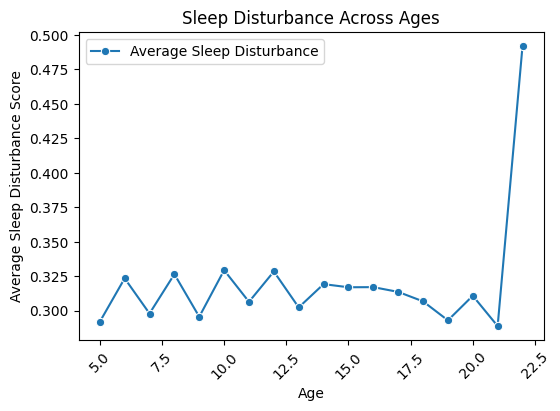

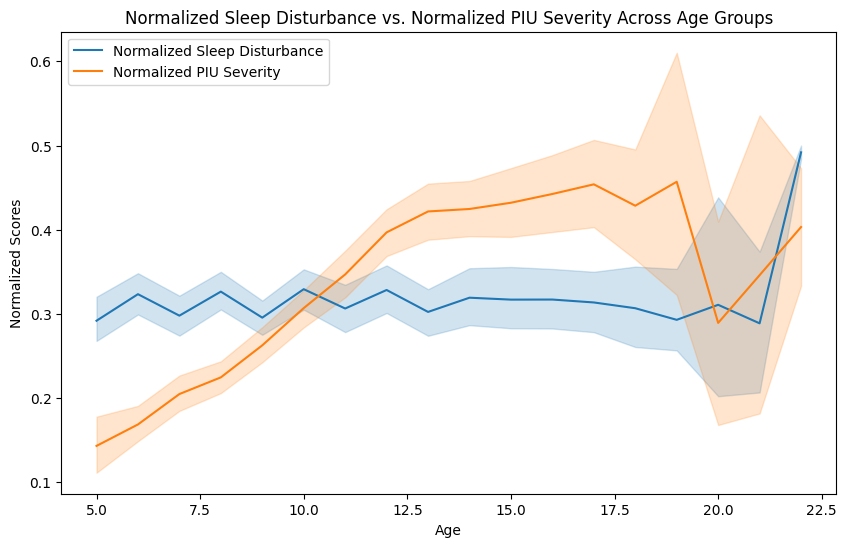

In [ ]:
#Group by age and calculate the mean of 'Sleep_Disturbance_Score'
age_grouped_sleep = df.groupby('Basic_Demos-Age')[['SDS-SDS_Total_T']].mean().reset_index()
age_grouped_sleep['SDS-SDS_Total_T'] = age_grouped_sleep['SDS-SDS_Total_T'].fillna(age_grouped_sleep['SDS-SDS_Total_T'].mean())


plt.figure(figsize=(6, 4))
sns.lineplot(x='Basic_Demos-Age', y='SDS-SDS_Total_T', data=age_grouped_sleep, marker='o', label='Average Sleep Disturbance')

plt.title("Sleep Disturbance Across Ages")
plt.xlabel("Age")
plt.ylabel("Average Sleep Disturbance Score")
plt.xticks(rotation=45)

plt.legend()
plt.show()


scaler = MinMaxScaler()

#Normalize 'SDS-SDS_Total_T' and 'PCIAT-PCIAT_Total'
df[['SDS-SDS_Total_T', 'PCIAT-PCIAT_Total']] = scaler.fit_transform(df[['SDS-SDS_Total_T', 'PCIAT-PCIAT_Total']])


plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Basic_Demos-Age', y='SDS-SDS_Total_T', label='Normalized Sleep Disturbance')
sns.lineplot(data=df, x='Basic_Demos-Age', y='PCIAT-PCIAT_Total', label='Normalized PIU Severity')

plt.title("Normalized Sleep Disturbance vs. Normalized PIU Severity Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Normalized Scores")
plt.legend()
plt.show()



### 6. Physical Activity vs. PIU Severity Across Age Groups (Line Plot)

The line plot illustrates a clear age-related trend where PIU severity rises through adolescence, peaks around age 17, and then decreases as individuals approach adulthood. This pattern could reflect typical internet use behaviors as younger individuals become more engaged with digital media and internet platforms during adolescence and later moderate their usage in adulthood.

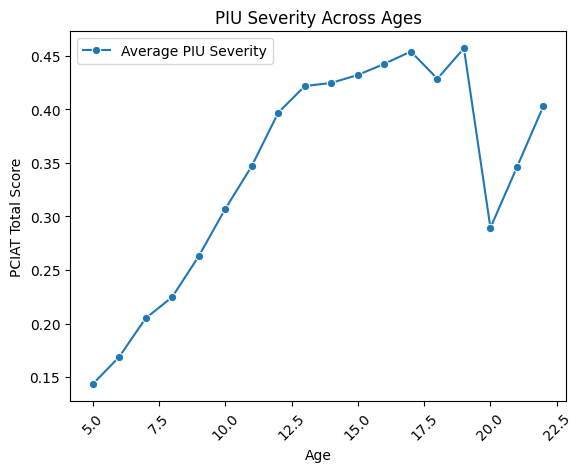

In [105]:
#Group by age and calculate the mean of 'PAQ_C-PAQ_C_Total' and 'PCIAT-PCIAT_Total'
age_grouped = df.groupby('Basic_Demos-Age')[['PCIAT-PCIAT_Total']].mean().reset_index()

age_grouped['PCIAT-PCIAT_Total'] = age_grouped['PCIAT-PCIAT_Total'].fillna(age_grouped['PCIAT-PCIAT_Total'].mean())


#Plot PIU severity
sns.lineplot(x='Basic_Demos-Age', y='PCIAT-PCIAT_Total', data=age_grouped, marker='o', label='Average PIU Severity')

plt.title("PIU Severity Across Ages")
plt.xlabel("Age")
plt.ylabel("PCIAT Total Score")
plt.xticks(rotation=45) 


plt.legend()
plt.show()

### 7. PIU Severity vs Sleep Disturbances (Scatter/Line Plot)


The scatter plot shows a positive trend between sleep disturbance scale and PIU severity. Although there is a correllation, the wide dispersion of data points suggests otherwise. Looking to further investgiate causes of PIU Severity. Similarly, the violin plot suggests great variability as well. Which suggests that those with a sever PIU experience a broader range of sleep related issues. 

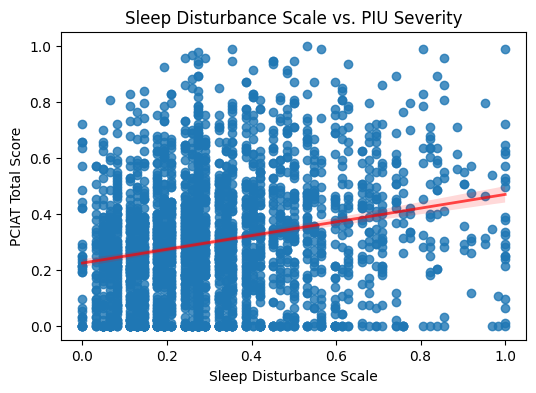

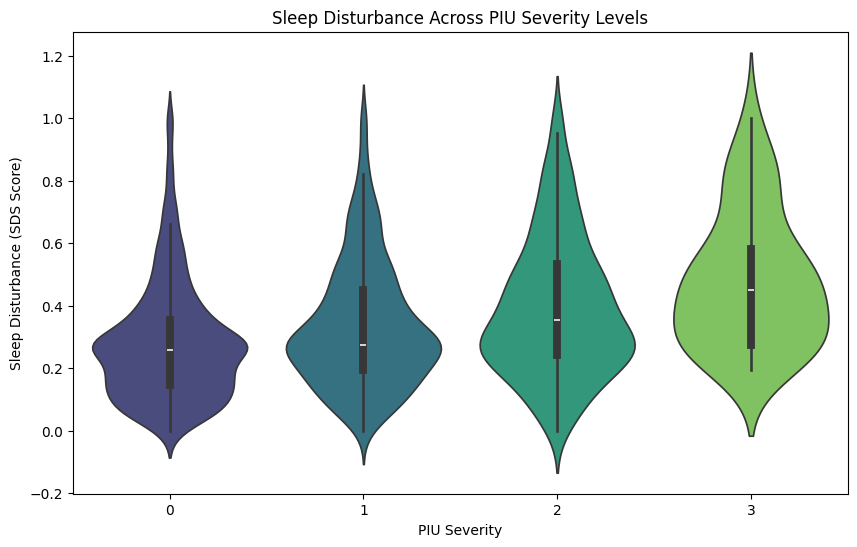

In [106]:
#Scatter Plot of Sleep Disturbance vs PIU Severity
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='SDS-SDS_Total_T', y='PCIAT-PCIAT_Total', line_kws={"color":"r","alpha":0.7,"lw":2})  
plt.title("Sleep Disturbance Scale vs. PIU Severity")
plt.xlabel("Sleep Disturbance Scale")
plt.ylabel("PCIAT Total Score")
plt.show()

#Box Plot of Sleep Disturbance vs PIU Severity
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sii', y='SDS-SDS_Total_T', palette='viridis')
plt.title("Sleep Disturbance Across PIU Severity Levels")
plt.xlabel("PIU Severity")
plt.ylabel("Sleep Disturbance (SDS Score)")
plt.show()

### 8. Gender Differences in PIU Severity (Violin Plot)

From the following violin plot, we do not observe any major differences between PIU on the basis of gender. Both genders show a similar distribution of PIU scores. 

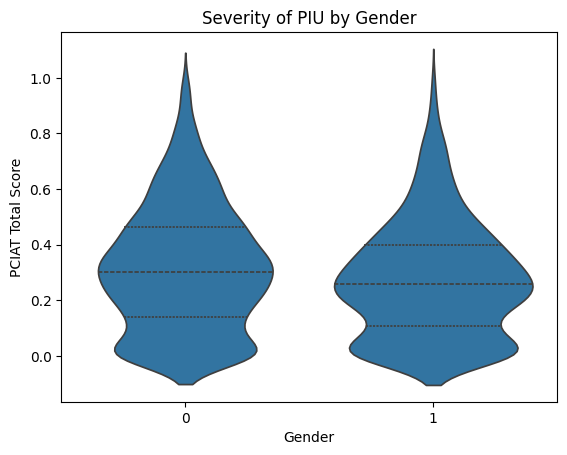

In [107]:
sns.violinplot(data=df, x='Basic_Demos-Sex', y='PCIAT-PCIAT_Total', inner='quartile')
plt.title("Severity of PIU by Gender")
plt.xlabel("Gender")
plt.ylabel("PCIAT Total Score")
plt.show()


### 9. Problematic Internet Use by Season of Participation

We thought seasons might have a weak relation to PIU, as time spent on the internet could change with the season. However, seasons indicate no relation to problematic internet use.

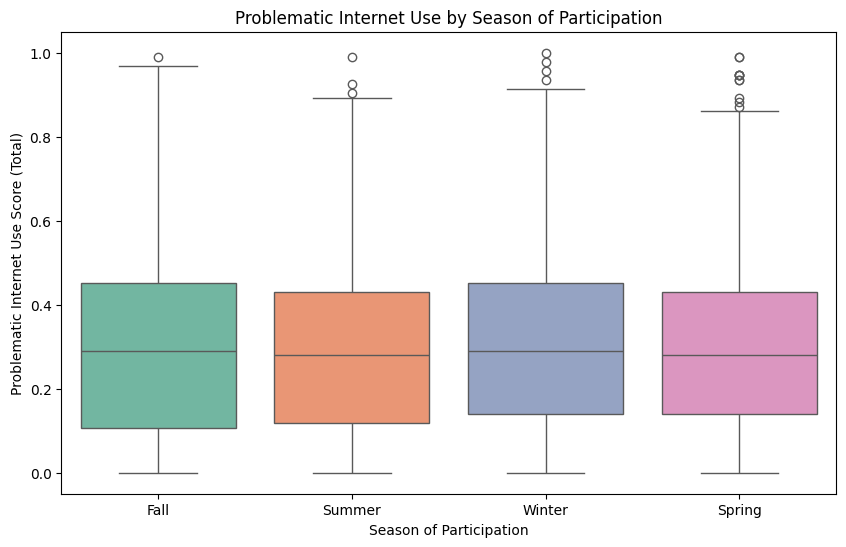

In [109]:

df_internet_use_season = df[['PCIAT-Season', 'PCIAT-PCIAT_Total']]

#Boxplot of problematic internet use by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_internet_use_season, x='PCIAT-Season', y='PCIAT-PCIAT_Total', palette='Set2')
plt.title("Problematic Internet Use by Season of Participation")
plt.xlabel("Season of Participation")
plt.ylabel("Problematic Internet Use Score (Total)")
plt.show()